# DATA - MID PROJECT REGRESSION

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### 1. Importing Data

In [118]:
old = pd.read_csv("regression_data.csv")
old.head()

7129300520 10/13/14  3     1  1180    5650  1.1  0  0.1  3.1   7  1180.1  \
0  6414100192  12/9/14  3  2.25  2570    7242  2.0  0    0    3   7    2170   
1  5631500400  2/25/15  2  1.00   770   10000  1.0  0    0    3   6     770   
2  2487200875  12/9/14  4  3.00  1960    5000  1.0  0    0    5   7    1050   
3  1954400510  2/18/15  3  2.00  1680    8080  1.0  0    0    3   8    1680   
4  7237550310  5/12/14  4  4.50  5420  101930  1.0  0    0    3  11    3890   

    0.2  1955   0.3  98178  47.5112  -122.257  1340  5650.1   221900  
0   400  1951  1991  98125  47.7210  -122.319  1690    7639   538000  
1     0  1933     0  98028  47.7379  -122.233  2720    8062   180000  
2   910  1965     0  98136  47.5208  -122.393  1360    5000   604000  
3     0  1987     0  98074  47.6168  -122.045  1800    7503   510000  
4  1530  2001     0  98053  47.6561  -122.005  4760  101930  1230000

##### 1.1 Modifying Headers

In [119]:
reg = pd.read_csv("regression_data.csv", names = ["id", "date", "bedrooms", "bathrooms", "sqft_living", 
                                                 "sqft_lot", "floors", "waterfront", "view","condition",
                                                 "grade", "sqft_above", "sqft_basement", "yr_built", 
                                                 "yr_renovated", "zipcode","lat","long","sqft_living15",
                                                 "sqft_lot15", "price"], header = None)
reg.head()

id      date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/14         3       1.00         1180      5650     1.0   
1  6414100192   12/9/14         3       2.25         2570      7242     2.0   
2  5631500400   2/25/15         2       1.00          770     10000     1.0   
3  2487200875   12/9/14         4       3.00         1960      5000     1.0   
4  1954400510   2/18/15         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15   price  
0             0    98178  47.5112 -122.257           1340        5650  221900  
1          1991    98125  47.7210 -122.319           1690        7639  538000  
2             0    98028  47.7379 -122.233           2720        8062  180000  
3             0    98136  47.5208 -122.393           1360        5000  604000  
4             0    98074  47.6168 -122.045           1800        7503  510000

### 2. General Glimpse

In [120]:
reg.shape

(21597, 21)

In [121]:
reg = reg.drop_duplicates(subset=['id'])
reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  int64  
 8   view           21420 non-null  int64  
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  int64  
 13  yr_built       21420 non-null  int64  
 14  yr_renovated   21420 non-null  int64  
 15  zipcode        21420 non-null  int64  
 16  lat            21420 non-null  float64
 17  long           21420 non-null  float64
 18  sqft_l

In [122]:
# tableau = reg.to_csv("reg.csv")

### 3. Data Cleaning and Wrangling

In [123]:
reg = reg.drop(["id","lat","long"], axis=1)
reg.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  10/13/14         3       1.00         1180      5650     1.0           0   
1   12/9/14         3       2.25         2570      7242     2.0           0   
2   2/25/15         2       1.00          770     10000     1.0           0   
3   12/9/14         4       3.00         1960      5000     1.0           0   
4   2/18/15         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  
0    98178           1340        5650  221900  
1    98125           1690        7639  538000  
2    98028           2720        8062  180000  
3    98136           1360        5000  604000  
4    98074           1800        7503  510000

In [124]:
reg["date"] = pd.to_datetime(reg["date"], format='%m/%d/%y')

In [125]:
reg.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 2014-10-13         3       1.00         1180      5650     1.0           0   
1 2014-12-09         3       2.25         2570      7242     2.0           0   
2 2015-02-25         2       1.00          770     10000     1.0           0   
3 2014-12-09         4       3.00         1960      5000     1.0           0   
4 2015-02-18         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  
0    98178           1340        5650  221900  
1    98125           1690        7639  538000  
2    98028           2720        8062  180000  
3    98136           1360        5000  604000  
4    98074           1800        7503  510000

In [126]:
reg['year'] = reg['date'].dt.year
reg['month'] = reg['date'].dt.month
reg['day'] = reg['date'].dt.day
reg.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0 2014-10-13         3       1.00         1180      5650     1.0           0   
1 2014-12-09         3       2.25         2570      7242     2.0           0   
2 2015-02-25         2       1.00          770     10000     1.0           0   
3 2014-12-09         4       3.00         1960      5000     1.0           0   
4 2015-02-18         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  
0    98178           1340        5650  221900  2014     10   13  
1    98125           1690        7639  538000  2014     12    9  
2    98028           2720        8062  180000  2015      2   25  
3    98136           1360        5000  604000  2014     12    9  
4    98074           1800        7503  510000  2015      2   18

In [127]:
reg = reg.drop(["date"], axis=1)
reg.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  
0    98178           1340        5650  221900  2014     10   13  
1    98125           1690        7639  538000  2014     12    9  
2    98028           2720        8062  180000  2015      2   25  
3    98136           1360        5000  604000  2014     12    9  
4    98074           1800        7503  510000  2015      2   18

### 4. Exploratory Data Analysis

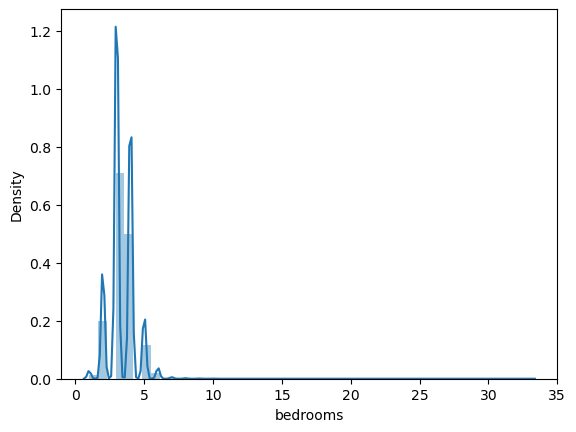

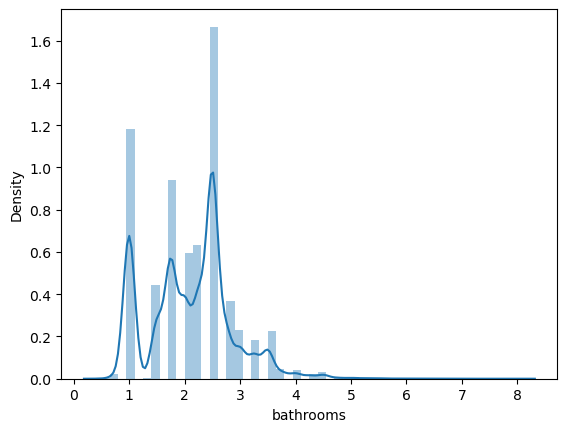

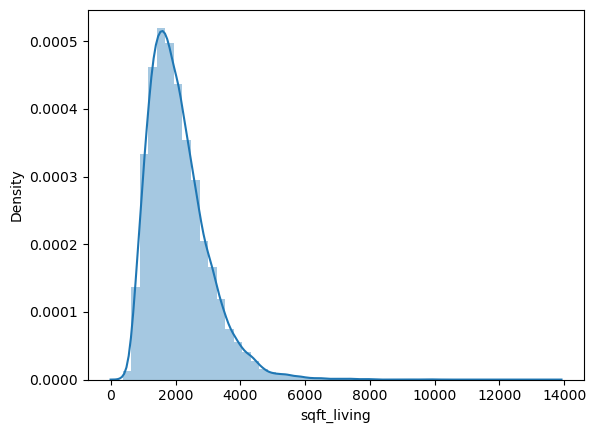

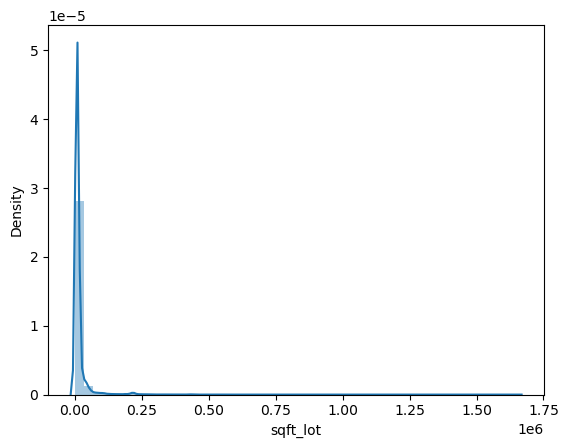

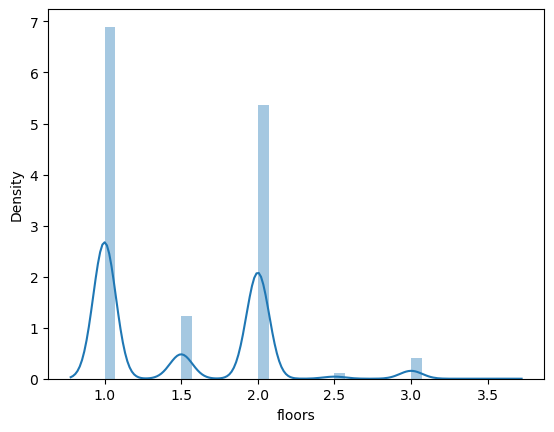

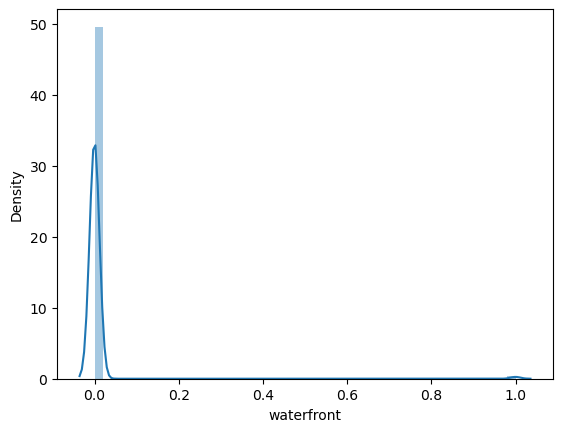

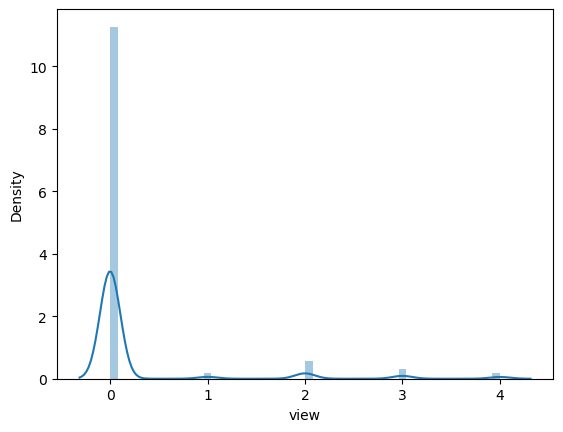

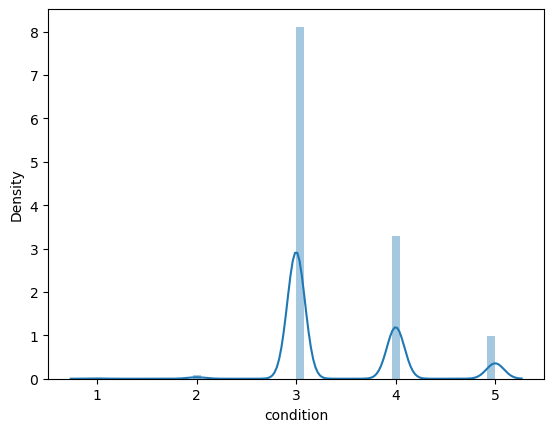

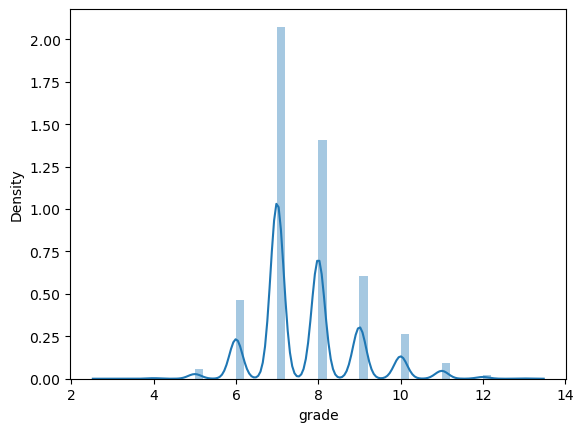

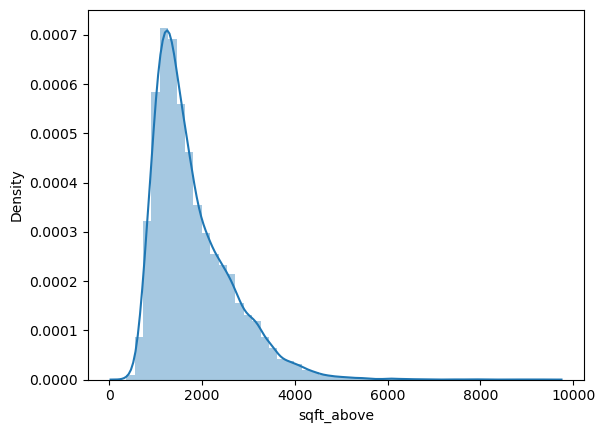

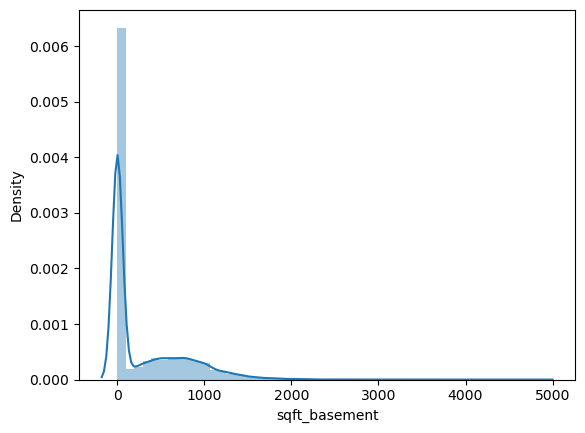

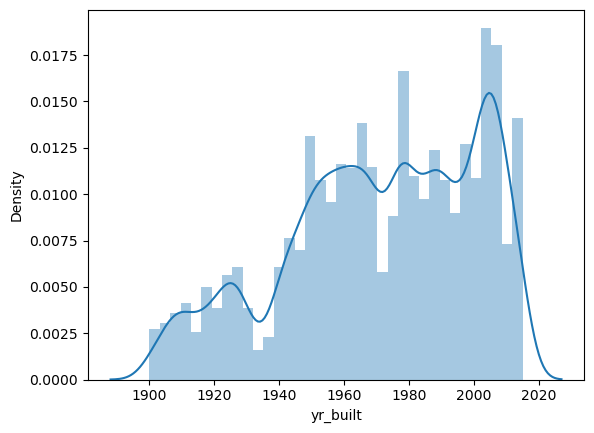

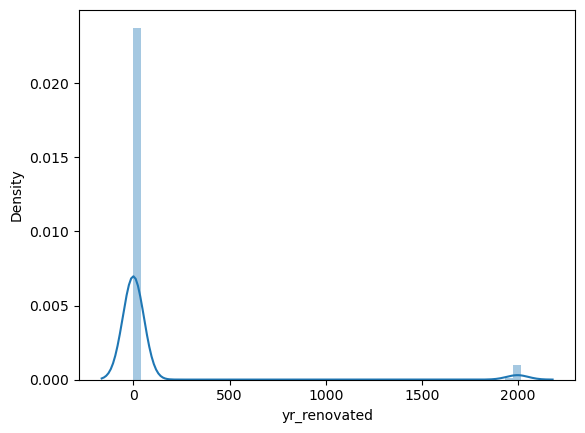

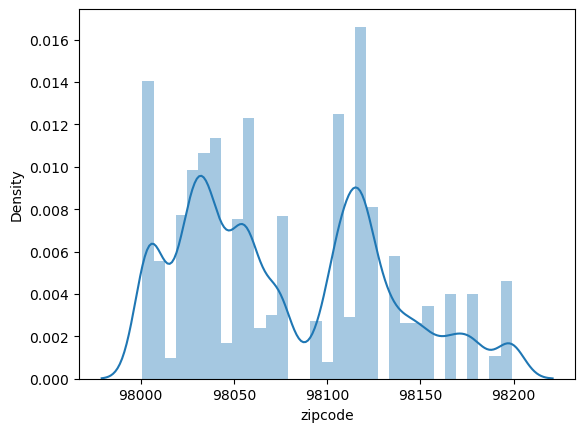

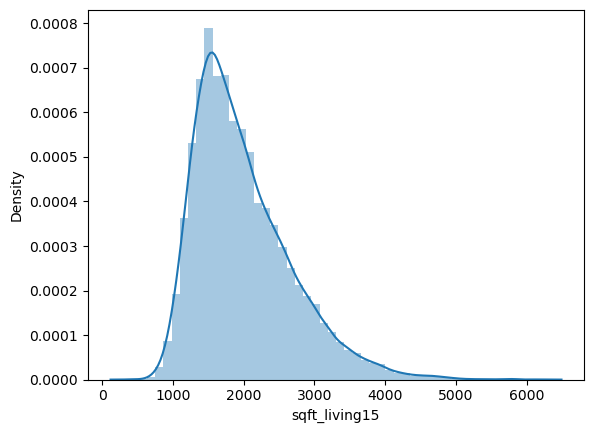

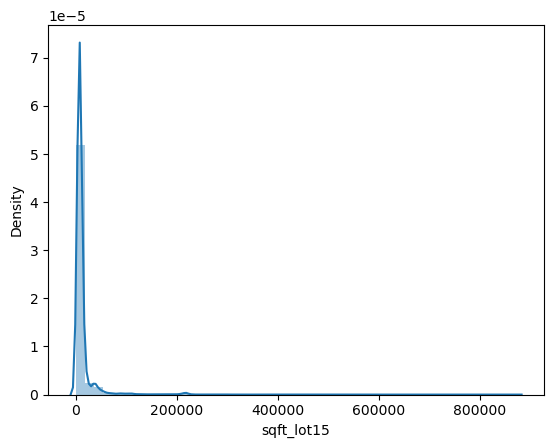

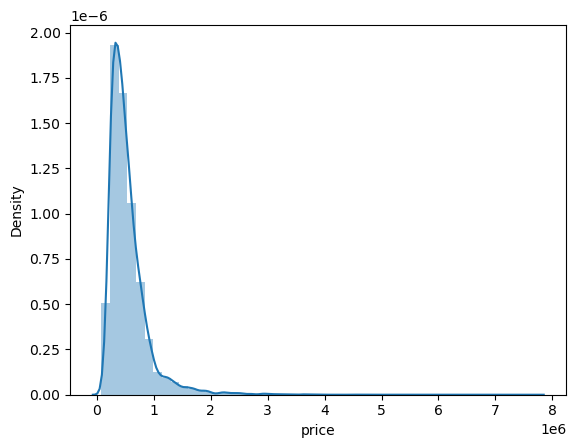

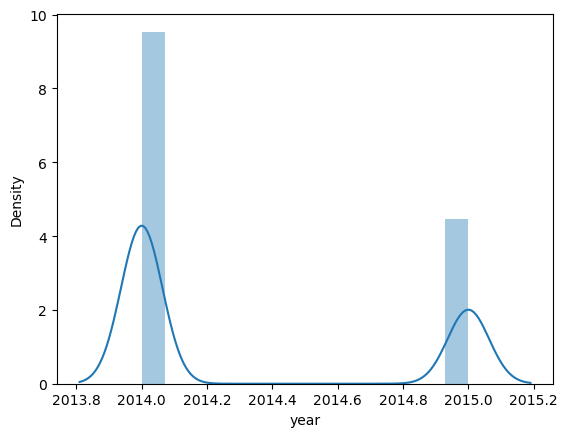

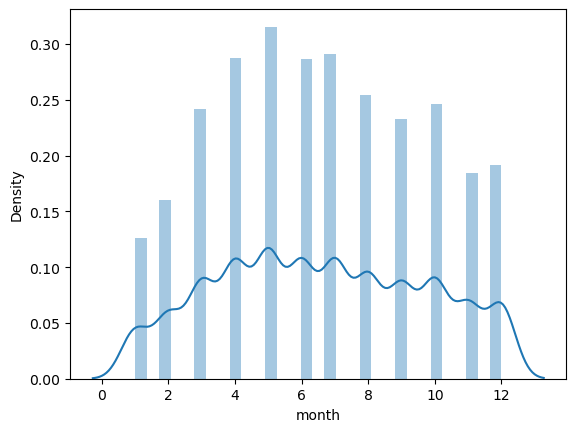

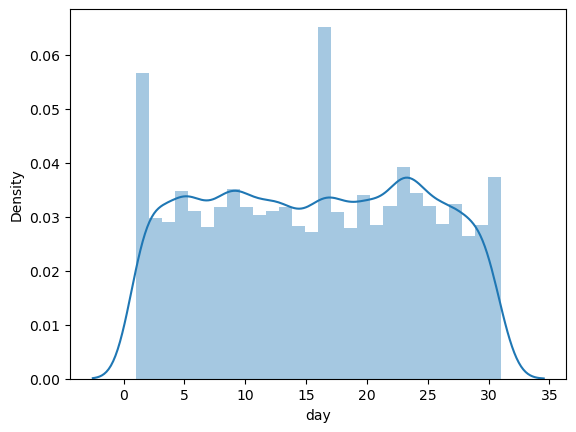

In [128]:
# Plotting Distribution of our Continuous Numerical Variables

for column in reg.columns:
    sns.distplot(reg[column])
    plt.show()

##### We can see right skewed distribution for most of our numerical columns.  We will have to apply Transformers on our continuous variables later to make our data closer to normal distribution, which is important to increase performance of our Linear Regression Model.

##### Also from distribution we can see which columns are discrete numericals.

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot

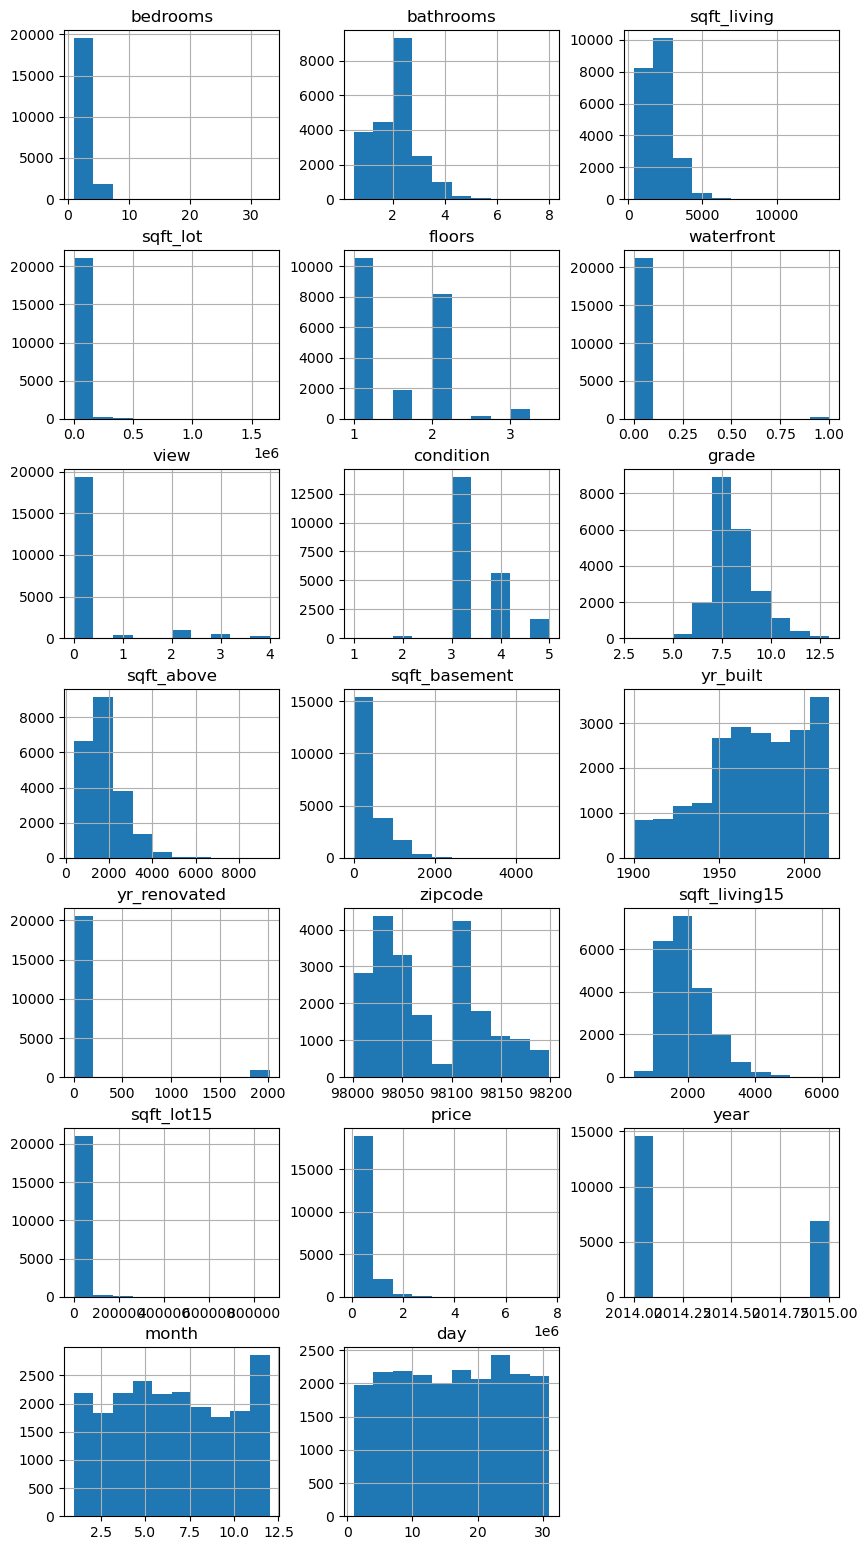

In [129]:
# Plotting an histogram to analyse numerical columns distribution
reg.hist(figsize=(10, 25),layout=(9,3))

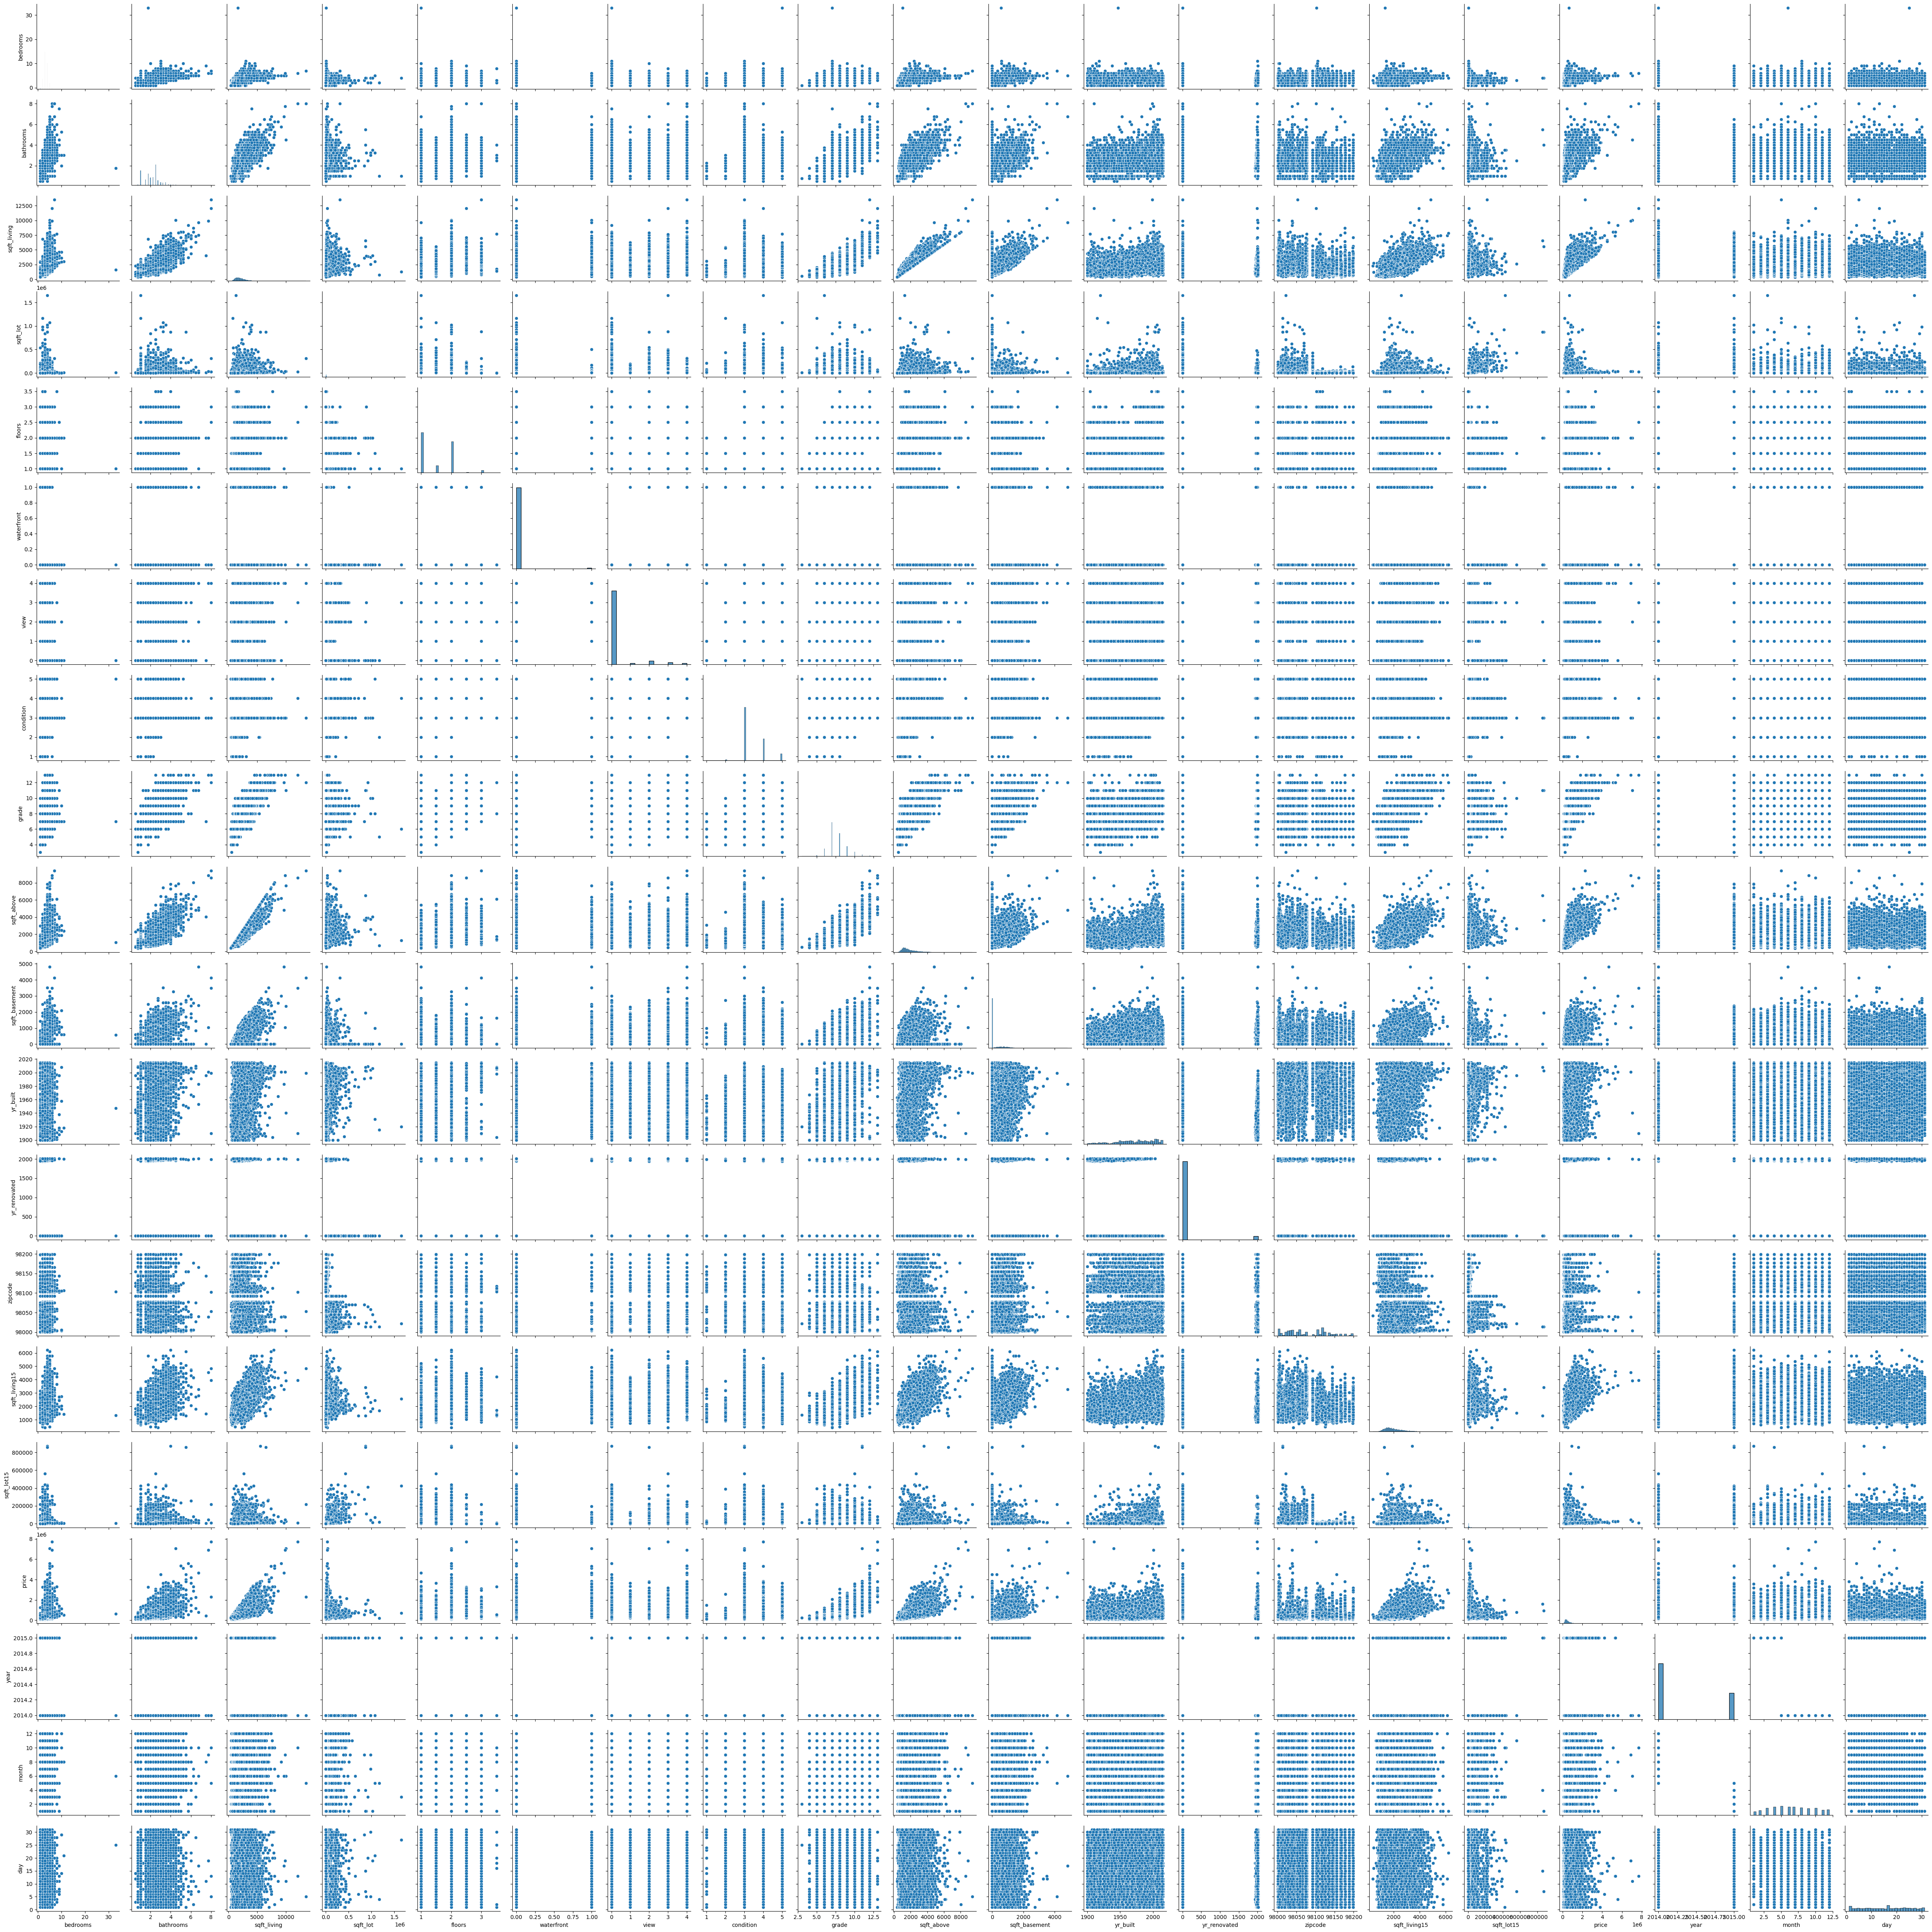

In [130]:
#Let's analyse relationship between numerical variables:
sns.pairplot(reg)

In [131]:
reg["bedrooms"].value_counts()


3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [132]:
reg["bathrooms"] = reg["bathrooms"].astype(int)
reg["floors"] = reg["floors"].astype(int)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  
0    98178           1340        5650  221900  2014     10   13

In [133]:
reg["bathrooms"].value_counts()

2    10478
1     8252
3     2217
4      335
0       74
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64

In [134]:
# sqft of the house , transform in square meter
reg["sqft_living"].value_counts()

1300    136
1440    133
1400    132
1660    128
1800    128
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

In [135]:
reg['sqm2_living'] = round(reg['sqft_living'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  
0    98178           1340        5650  221900  2014     10   13        109.6

In [136]:
reg["sqft_lot"].value_counts()

5000      355
6000      286
4000      249
7200      218
7500      118
         ... 
24330       1
215622      1
6022        1
2323        1
1076        1
Name: sqft_lot, Length: 9776, dtype: int64

In [137]:
reg['sqm2_lot'] = round(reg['sqft_lot'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  
0     524.9

In [138]:
reg["floors"].value_counts()

1    12440
2     8364
3      616
Name: floors, dtype: int64

In [139]:
reg["waterfront"].value_counts()

0    21257
1      163
Name: waterfront, dtype: int64

In [140]:
 reg["view"].value_counts()

0    19306
2      960
3      507
1      331
4      316
Name: view, dtype: int64

In [141]:
# bucket in viewed or not viewed
def viewed_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [142]:
reg['viewed_or_not'] = reg['view'].apply(viewed_or_not)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  
0     524.9              0

In [143]:
reg["viewed_or_not"].value_counts()

0    19306
1     2114
Name: viewed_or_not, dtype: int64

In [144]:
reg["condition"].value_counts()

3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64

In [145]:
reg["grade"].value_counts()

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [146]:
reg["sqft_above"].value_counts()

1300    210
1010    204
1200    203
1220    186
1140    183
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: sqft_above, Length: 942, dtype: int64

In [147]:
reg['sqm2_above'] = round(reg['sqft_above'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  
0     524.9              0       109.6

In [148]:
reg["sqft_basement"].value_counts()

0      12999
600      220
700      215
500      211
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [149]:
reg['sqm2_basement'] = round(reg['sqft_basement'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  
0     524.9              0       109.6            0.0

In [150]:
reg["yr_built"].value_counts()

2014    559
2006    453
2005    450
2004    429
2003    420
       ... 
1933     29
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [151]:
reg["age"] = 2023 - reg["yr_built"]
reg["age"].value_counts()

9      559
17     453
18     450
19     429
20     420
      ... 
90      29
122     29
121     27
88      24
89      21
Name: age, Length: 116, dtype: int64

In [152]:
# Bucketing in age groups

def group_year(val):
    if val in [0, 30]:
        return 0
    elif val in [31, 60]:
        return 1
    elif val in [61, 90]:
        return 2
    else:
        return 3

In [153]:
reg['age_group'] = reg['age'].apply(group_year)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  age_group  
0     524.9              0       109.6            0.0   68          3

In [154]:
reg["yr_renovated"].value_counts()

0       20510
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [155]:
# bucketing renovated or not

def ren_or_not(val):
    if val == 0:
        return 0
    else:
        return 1

In [156]:
reg['ren_or_not'] = reg['yr_renovated'].apply(ren_or_not)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  age_group  \
0     524.9              0       109.6            0.0   68          3   

   ren_or_not  
0           0

In [157]:
reg["zipcode"].value_counts()

98103    600
98038    586
98115    576
98052    571
98117    548
        ... 
98102    104
98010     99
98024     79
98148     56
98039     49
Name: zipcode, Length: 70, dtype: int64

In [158]:
reg["sqft_living15"].value_counts()

1540    193
1440    190
1560    190
1500    178
1460    168
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

In [159]:
reg['sqm2_living15'] = round(reg['sqft_living15'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  age_group  \
0     524.9              0       109.6            0.0   68          3   

   ren_or_not  sqm2_living15  
0           0          124.5

In [160]:
reg["sqft_lot15"].value_counts()

5000     425
4000     354
6000     285
7200     209
4800     144
        ... 
14484      1
1709       1
8721       1
12881      1
2007       1
Name: sqft_lot15, Length: 8682, dtype: int64

In [161]:
reg['sqm2_lot15'] = round(reg['sqft_lot15'] / 10.764, 1)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  year  month  day  sqm2_living  \
0    98178           1340        5650  221900  2014     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  age_group  \
0     524.9              0       109.6            0.0   68          3   

   ren_or_not  sqm2_living15  sqm2_lot15  
0           0          124.5       524.9

In [162]:
reg["price"].value_counts()

350000    172
450000    171
550000    156
500000    151
425000    150
         ... 
231200      1
580135      1
653450      1
826600      1
402101      1
Name: price, Length: 3607, dtype: int64

In [163]:
reg["year"].value_counts()

2014    14588
2015     6832
Name: year, dtype: int64

In [164]:
# houses sold in 2014 e 2015 --> only two , we decided to drop them
reg = reg.drop(["year"], axis=1)
reg.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   
1         3          2         2570      7242       2           0     0   
2         2          1          770     10000       1           0     0   
3         4          3         1960      5000       1           0     0   
4         3          2         1680      8080       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  month  day  sqm2_living  \
0    98178           1340        5650  221900     10   13        109.6   
1    98125           1690        7639  538000     12    9        238.8   
2    98028           2720        8062  180000      2   25         71.5   
3    98136           1360        5000  604000     12    9        182.1   
4    98074           1800        7503  510000      2   18        156.1   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  age_group  \
0     524.9              0       109.6            0.0   68          3   
1     672.8              0       201.6           37.2   72          3   
2     929.0              0        71.5            0.0   90          2   
3     464.5              0        97.5           84.5   58          3   
4     750.7              0       156.1            0.0   36          3   

   ren_or_not  sqm2_living15  sqm2_lot15  
0           0          124.5       524.9  
1           1          157.0       709.7  
2           0          252.7       749.0  
3           0          126.3       464.5  
4           0          167.2       697.0

In [165]:
reg["month"].value_counts()

5     2398
7     2211
4     2187
6     2178
8     1936
10    1870
3     1835
9     1770
12    1454
11    1401
2     1220
1      960
Name: month, dtype: int64

In [166]:
# Bucketing months into Quarters
def quarter(val):
      if val >= 1 and val <= 3:
        return 1 
      if val >= 4  and val <=6:
        return 2    
      if val >= 7 and val <= 9:
        return 3
      else:
        return 4

In [167]:
reg["quarter"] = reg["month"].apply(quarter)
reg.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   

   zipcode  sqft_living15  sqft_lot15   price  month  day  sqm2_living  \
0    98178           1340        5650  221900     10   13        109.6   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  age_group  \
0     524.9              0       109.6            0.0   68          3   

   ren_or_not  sqm2_living15  sqm2_lot15  quarter  
0           0          124.5       524.9        4

In [168]:
reg["day"].value_counts()

23    900
9     805
5     799
24    788
20    781
16    753
27    743
17    743
2     734
25    732
22    732
8     731
13    729
10    728
6     711
12    711
18    710
11    694
3     681
4     667
26    659
29    653
21    653
14    650
7     646
19    639
15    622
30    606
28    605
1     565
31    250
Name: day, dtype: int64

In [169]:
# Bucket the day number into fortnights
def quinzena(day):
     if day >= 1 and day <= 14:
        return 1 
     else:
        return 2

In [170]:
reg["fortnight"] = reg["day"].apply(quinzena)

In [171]:
reg["fortnight"].value_counts()

2    11569
1     9851
Name: fortnight, dtype: int64

In [172]:
reg.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   
1         3          2         2570      7242       2           0     0   
2         2          1          770     10000       1           0     0   
3         4          3         1960      5000       1           0     0   
4         3          2         1680      8080       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  month  day  sqm2_living  \
0    98178           1340        5650  221900     10   13        109.6   
1    98125           1690        7639  538000     12    9        238.8   
2    98028           2720        8062  180000      2   25         71.5   
3    98136           1360        5000  604000     12    9        182.1   
4    98074           1800        7503  510000      2   18        156.1   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  age_group  \
0     524.9              0       109.6            0.0   68          3   
1     672.8              0       201.6           37.2   72          3   
2     929.0              0        71.5            0.0   90          2   
3     464.5              0        97.5           84.5   58          3   
4     750.7              0       156.1            0.0   36          3   

   ren_or_not  sqm2_living15  sqm2_lot15  quarter  fortnight  
0           0          124.5       524.9        4          1  
1           1          157.0       709.7        4          1  
2           0          252.7       749.0        1          2  
3           0          126.3       464.5        4          1  
4           0          167.2       697.0        1          2

In [173]:
reg_model = reg.copy()

In [174]:
reg_model.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3          1         1180      5650       1           0     0   
1         3          2         2570      7242       2           0     0   
2         2          1          770     10000       1           0     0   
3         4          3         1960      5000       1           0     0   
4         3          2         1680      8080       1           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   
2          3      6         770              0      1933             0   
3          5      7        1050            910      1965             0   
4          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15   price  month  day  sqm2_living  \
0    98178           1340        5650  221900     10   13        109.6   
1    98125           1690        7639  538000     12    9        238.8   
2    98028           2720        8062  180000      2   25         71.5   
3    98136           1360        5000  604000     12    9        182.1   
4    98074           1800        7503  510000      2   18        156.1   

   sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age  age_group  \
0     524.9              0       109.6            0.0   68          3   
1     672.8              0       201.6           37.2   72          3   
2     929.0              0        71.5            0.0   90          2   
3     464.5              0        97.5           84.5   58          3   
4     750.7              0       156.1            0.0   36          3   

   ren_or_not  sqm2_living15  sqm2_lot15  quarter  fortnight  
0           0          124.5       524.9        4          1  
1           1          157.0       709.7        4          1  
2           0          252.7       749.0        1          2  
3           0          126.3       464.5        4          1  
4           0          167.2       697.0        1          2

In [175]:
reg_model.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price', 'month', 'day', 'sqm2_living', 'sqm2_lot',
       'viewed_or_not', 'sqm2_above', 'sqm2_basement', 'age', 'age_group',
       'ren_or_not', 'sqm2_living15', 'sqm2_lot15', 'quarter', 'fortnight'],
      dtype='object')

In [176]:
reg_model = reg_model.drop(["view","sqft_living", "sqft_lot", "sqft_above",
                            "sqft_basement", "yr_built", "yr_renovated", "zipcode", "sqft_living15", 
                            "sqft_lot15", "month", "day", "age"], axis = 1)
reg_model.head()

bedrooms  bathrooms  floors  waterfront  condition  grade   price  \
0         3          1       1           0          3      7  221900   
1         3          2       2           0          3      7  538000   
2         2          1       1           0          3      6  180000   
3         4          3       1           0          5      7  604000   
4         3          2       1           0          3      8  510000   

   sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age_group  \
0        109.6     524.9              0       109.6            0.0          3   
1        238.8     672.8              0       201.6           37.2          3   
2         71.5     929.0              0        71.5            0.0          2   
3        182.1     464.5              0        97.5           84.5          3   
4        156.1     750.7              0       156.1            0.0          3   

   ren_or_not  sqm2_living15  sqm2_lot15  quarter  fortnight  
0           0          124.5       524.9        4          1  
1           1          157.0       709.7        4          1  
2           0          252.7       749.0        1          2  
3           0          126.3       464.5        4          1  
4           0          167.2       697.0        1          2

In [177]:
reg_model["living_sqm15_init"] = reg["sqm2_living15"] - reg["sqm2_living"]
reg_model.head()

bedrooms  bathrooms  floors  waterfront  condition  grade   price  \
0         3          1       1           0          3      7  221900   
1         3          2       2           0          3      7  538000   
2         2          1       1           0          3      6  180000   
3         4          3       1           0          5      7  604000   
4         3          2       1           0          3      8  510000   

   sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age_group  \
0        109.6     524.9              0       109.6            0.0          3   
1        238.8     672.8              0       201.6           37.2          3   
2         71.5     929.0              0        71.5            0.0          2   
3        182.1     464.5              0        97.5           84.5          3   
4        156.1     750.7              0       156.1            0.0          3   

   ren_or_not  sqm2_living15  sqm2_lot15  quarter  fortnight  \
0           0          124.5       524.9        4          1   
1           1          157.0       709.7        4          1   
2           0          252.7       749.0        1          2   
3           0          126.3       464.5        4          1   
4           0          167.2       697.0        1          2   

   living_sqm15_init  
0               14.9  
1              -81.8  
2              181.2  
3              -55.8  
4               11.1

In [178]:
# Bucket if after renovation got bigger or not
def bigger_living_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [179]:
reg_model['bigger_living_or_not'] = reg_model["living_sqm15_init"].apply(bigger_living_or_not)
reg_model.head(1)

bedrooms  bathrooms  floors  waterfront  condition  grade   price  \
0         3          1       1           0          3      7  221900   

   sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age_group  \
0        109.6     524.9              0       109.6            0.0          3   

   ren_or_not  sqm2_living15  sqm2_lot15  quarter  fortnight  \
0           0          124.5       524.9        4          1   

   living_sqm15_init  bigger_living_or_not  
0               14.9                     1

In [180]:
reg_model["bigger_living_or_not"].value_counts()

0    12313
1     9107
Name: bigger_living_or_not, dtype: int64

In [181]:
reg_model["lot_sqm15_init"] = reg["sqm2_lot15"] - reg["sqm2_lot"]
reg_model.head()

bedrooms  bathrooms  floors  waterfront  condition  grade   price  \
0         3          1       1           0          3      7  221900   
1         3          2       2           0          3      7  538000   
2         2          1       1           0          3      6  180000   
3         4          3       1           0          5      7  604000   
4         3          2       1           0          3      8  510000   

   sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age_group  \
0        109.6     524.9              0       109.6            0.0          3   
1        238.8     672.8              0       201.6           37.2          3   
2         71.5     929.0              0        71.5            0.0          2   
3        182.1     464.5              0        97.5           84.5          3   
4        156.1     750.7              0       156.1            0.0          3   

   ren_or_not  sqm2_living15  sqm2_lot15  quarter  fortnight  \
0           0          124.5       524.9        4          1   
1           1          157.0       709.7        4          1   
2           0          252.7       749.0        1          2   
3           0          126.3       464.5        4          1   
4           0          167.2       697.0        1          2   

   living_sqm15_init  bigger_living_or_not  lot_sqm15_init  
0               14.9                     1             0.0  
1              -81.8                     0            36.9  
2              181.2                     1          -180.0  
3              -55.8                     0             0.0  
4               11.1                     1           -53.7

In [182]:
# same as the above, but now with lot size
def bigger_lot_or_not(val):
      if val <= 0:
        return 0  
      else:
        return 1

In [183]:
reg_model['bigger_lot_or_not'] = reg_model["lot_sqm15_init"].apply(bigger_lot_or_not)
reg_model.head()

bedrooms  bathrooms  floors  waterfront  condition  grade   price  \
0         3          1       1           0          3      7  221900   
1         3          2       2           0          3      7  538000   
2         2          1       1           0          3      6  180000   
3         4          3       1           0          5      7  604000   
4         3          2       1           0          3      8  510000   

   sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age_group  \
0        109.6     524.9              0       109.6            0.0          3   
1        238.8     672.8              0       201.6           37.2          3   
2         71.5     929.0              0        71.5            0.0          2   
3        182.1     464.5              0        97.5           84.5          3   
4        156.1     750.7              0       156.1            0.0          3   

   ren_or_not  sqm2_living15  sqm2_lot15  quarter  fortnight  \
0           0          124.5       524.9        4          1   
1           1          157.0       709.7        4          1   
2           0          252.7       749.0        1          2   
3           0          126.3       464.5        4          1   
4           0          167.2       697.0        1          2   

   living_sqm15_init  bigger_living_or_not  lot_sqm15_init  bigger_lot_or_not  
0               14.9                     1             0.0                  0  
1              -81.8                     0            36.9                  1  
2              181.2                     1          -180.0                  0  
3              -55.8                     0             0.0                  0  
4               11.1                     1           -53.7                  0

In [184]:
reg_model.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'price', 'sqm2_living', 'sqm2_lot', 'viewed_or_not', 'sqm2_above',
       'sqm2_basement', 'age_group', 'ren_or_not', 'sqm2_living15',
       'sqm2_lot15', 'quarter', 'fortnight', 'living_sqm15_init',
       'bigger_living_or_not', 'lot_sqm15_init', 'bigger_lot_or_not'],
      dtype='object')

In [185]:
reg_model = reg_model.drop(["living_sqm15_init", "lot_sqm15_init"], axis = 1)
reg_model.head()

bedrooms  bathrooms  floors  waterfront  condition  grade   price  \
0         3          1       1           0          3      7  221900   
1         3          2       2           0          3      7  538000   
2         2          1       1           0          3      6  180000   
3         4          3       1           0          5      7  604000   
4         3          2       1           0          3      8  510000   

   sqm2_living  sqm2_lot  viewed_or_not  sqm2_above  sqm2_basement  age_group  \
0        109.6     524.9              0       109.6            0.0          3   
1        238.8     672.8              0       201.6           37.2          3   
2         71.5     929.0              0        71.5            0.0          2   
3        182.1     464.5              0        97.5           84.5          3   
4        156.1     750.7              0       156.1            0.0          3   

   ren_or_not  sqm2_living15  sqm2_lot15  quarter  fortnight  \
0           0          124.5       524.9        4          1   
1           1          157.0       709.7        4          1   
2           0          252.7       749.0        1          2   
3           0          126.3       464.5        4          1   
4           0          167.2       697.0        1          2   

   bigger_living_or_not  bigger_lot_or_not  
0                     1                  0  
1                     0                  1  
2                     1                  0  
3                     0                  0  
4                     1                  0

In [186]:
# Diving the numerical from the categorical

In [187]:
target = reg_model["price"]

In [188]:
cat_model = reg_model[["floors","bedrooms","bathrooms", 'waterfront', 'condition', 'grade', 'viewed_or_not','age_group', 'ren_or_not', 
                       'quarter', 'fortnight',"bigger_living_or_not", 'bigger_lot_or_not']]
cat_model.head()

floors  bedrooms  bathrooms  waterfront  condition  grade  viewed_or_not  \
0       1         3          1           0          3      7              0   
1       2         3          2           0          3      7              0   
2       1         2          1           0          3      6              0   
3       1         4          3           0          5      7              0   
4       1         3          2           0          3      8              0   

   age_group  ren_or_not  quarter  fortnight  bigger_living_or_not  \
0          3           0        4          1                     1   
1          3           1        4          1                     0   
2          2           0        1          2                     1   
3          3           0        4          1                     0   
4          3           0        1          2                     1   

   bigger_lot_or_not  
0                  0  
1                  1  
2                  0  
3                  0  
4                  0

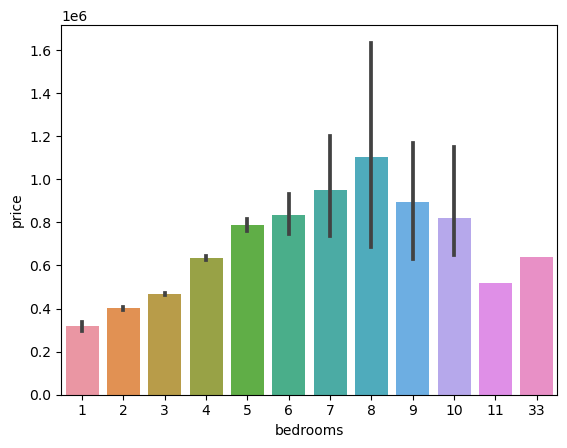

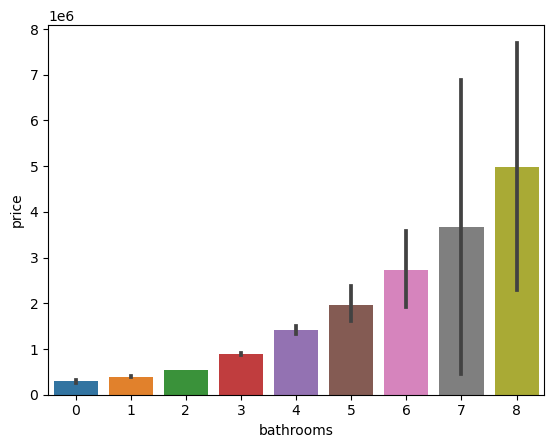

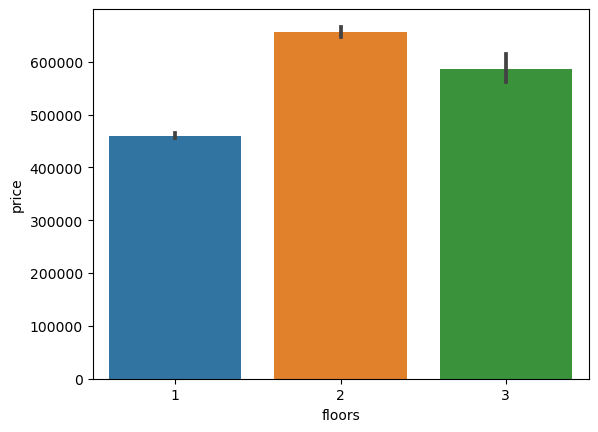

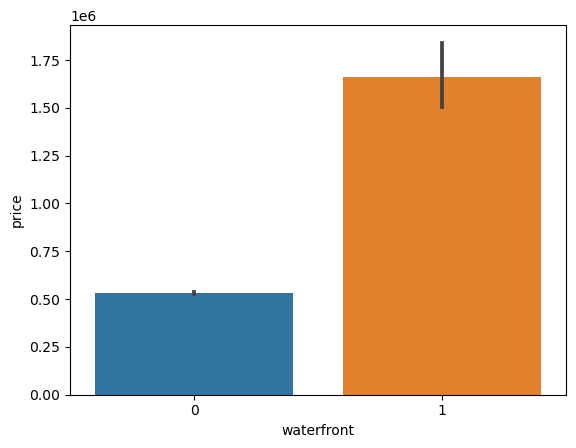

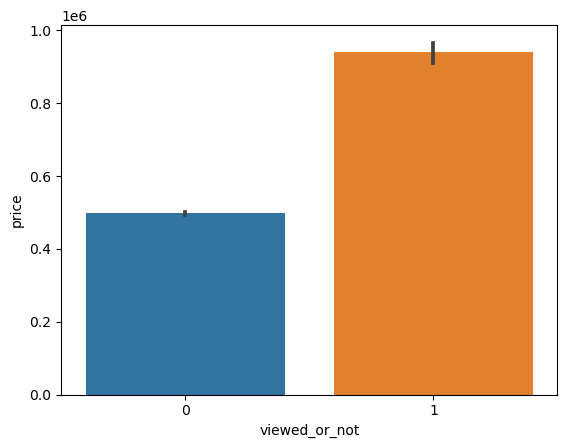

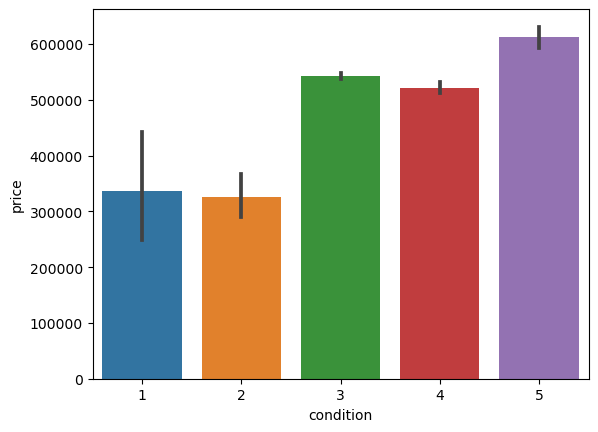

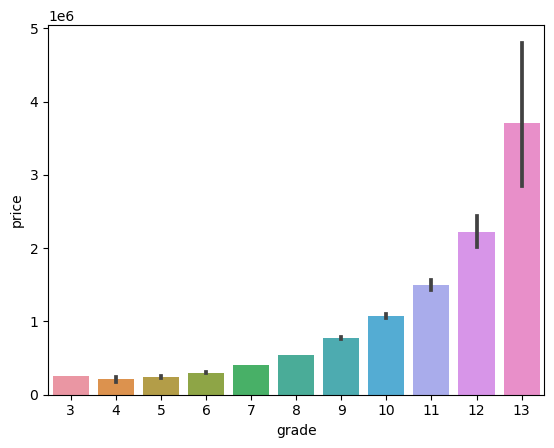

In [189]:
#Categorical We are going to treat our Discrete Numerical Variables as categorical Data.
# Visualize categorical data with Target variable "Price"

sns.barplot(x="bedrooms", y="price", data = reg_model)
plt.show()

sns.barplot(x="bathrooms", y="price", data = reg_model)
plt.show()

sns.barplot(x="floors", y="price", data = reg_model)
plt.show()

sns.barplot(x="waterfront", y="price", data = reg_model)
plt.show()

sns.barplot(x="viewed_or_not", y="price", data = reg_model)
plt.show()

sns.barplot(x="condition", y="price", data = reg_model)
plt.show()

sns.barplot(x="grade", y="price", data = reg_model)
plt.show()

In [190]:
num_model = reg_model[['sqm2_living', 'sqm2_lot', 'sqm2_above', 'sqm2_basement', 
                       'sqm2_living15', 'sqm2_lot15']]
num_model.head()  

sqm2_living  sqm2_lot  sqm2_above  sqm2_basement  sqm2_living15  sqm2_lot15
0        109.6     524.9       109.6            0.0          124.5       524.9
1        238.8     672.8       201.6           37.2          157.0       709.7
2         71.5     929.0        71.5            0.0          252.7       749.0
3        182.1     464.5        97.5           84.5          126.3       464.5
4        156.1     750.7       156.1            0.0          167.2       697.0

array([[<AxesSubplot:title={'center':'sqm2_living'}>,
        <AxesSubplot:title={'center':'sqm2_lot'}>,
        <AxesSubplot:title={'center':'sqm2_above'}>],
       [<AxesSubplot:title={'center':'sqm2_basement'}>,
        <AxesSubplot:title={'center':'sqm2_living15'}>,
        <AxesSubplot:title={'center':'sqm2_lot15'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

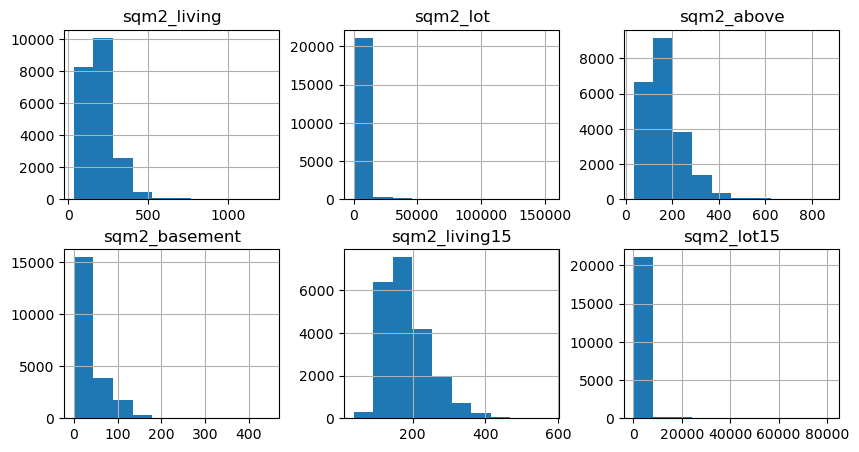

In [191]:
# Plotting an histogram to analyse numerical columns distribution
num_model.hist(figsize=(10, 25),layout=(9,3))

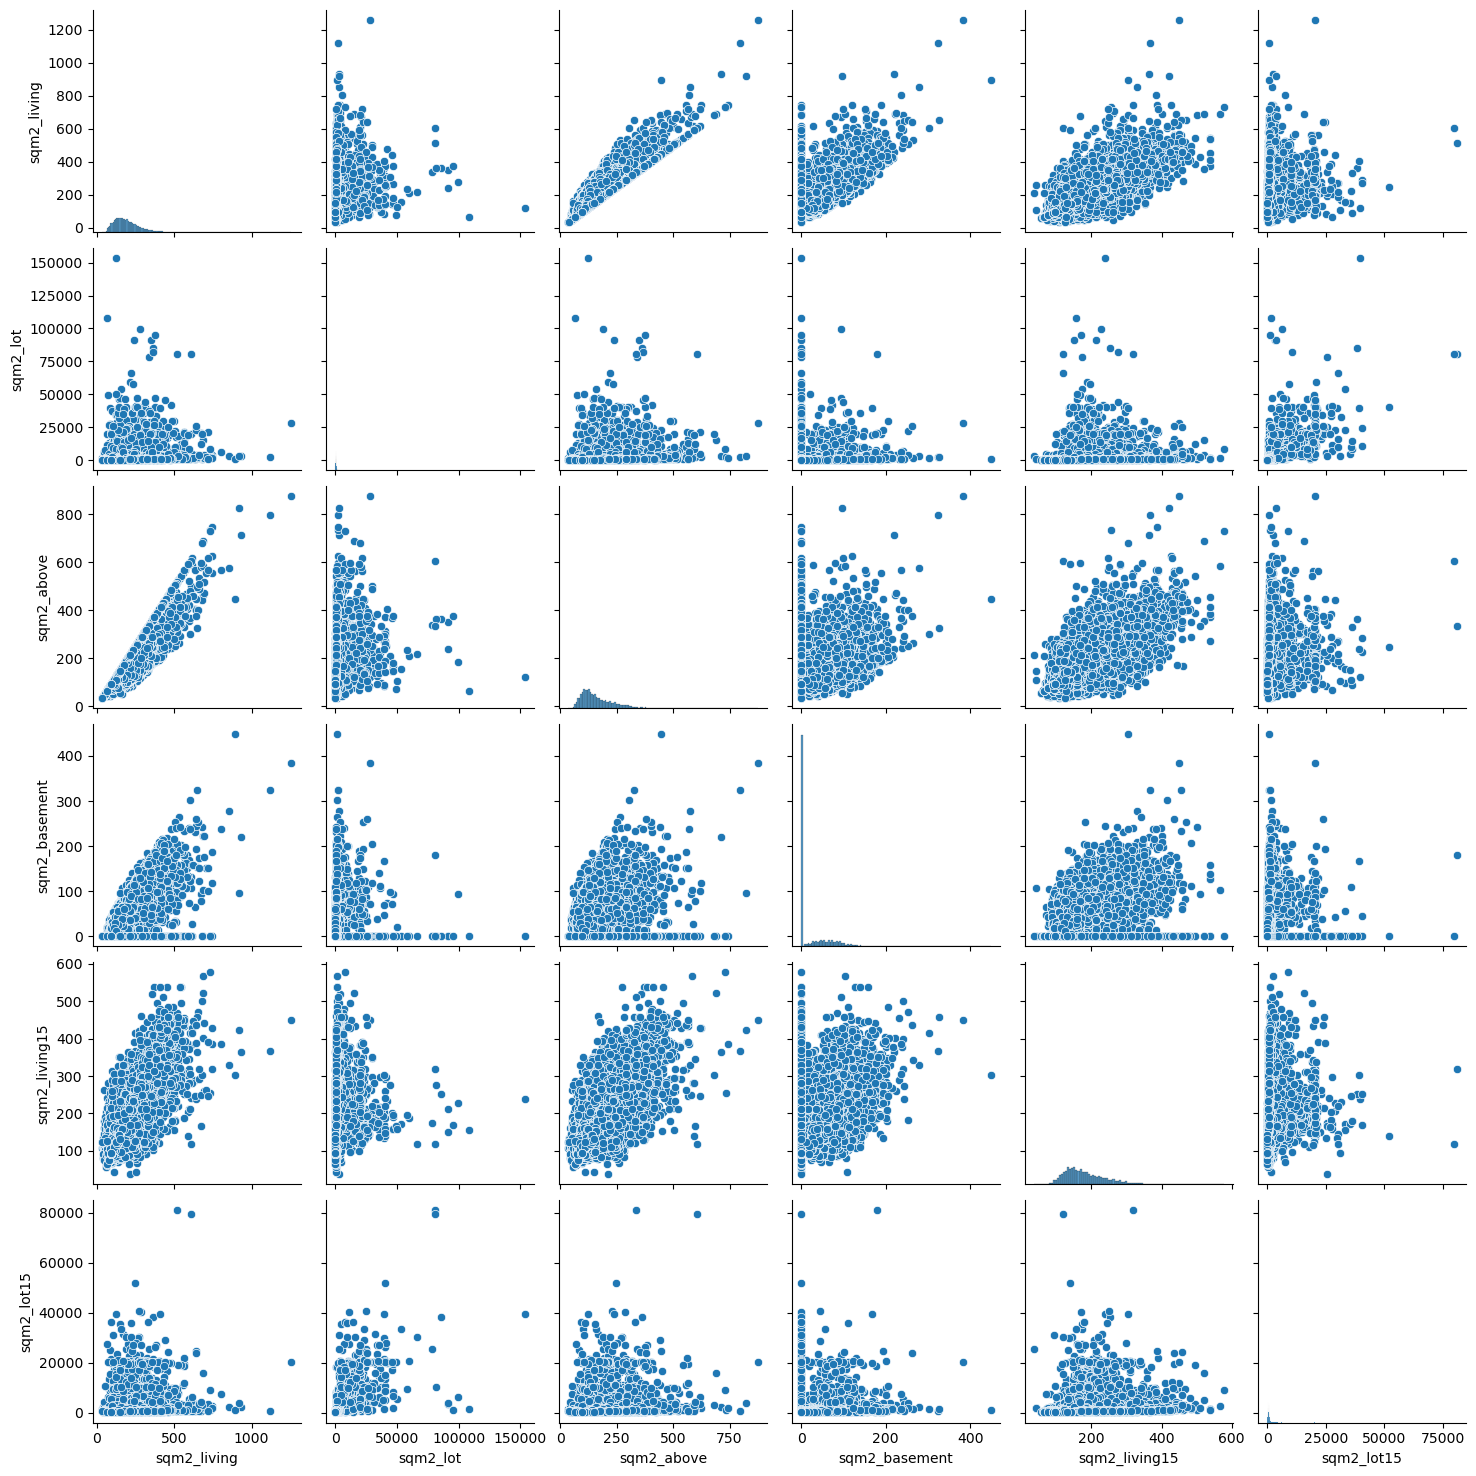

In [192]:
sns.pairplot(num_model)

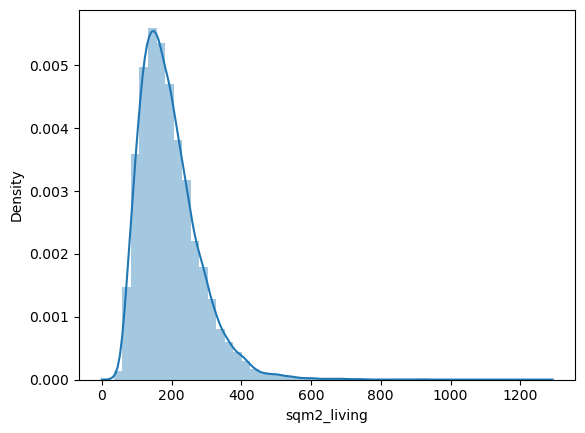

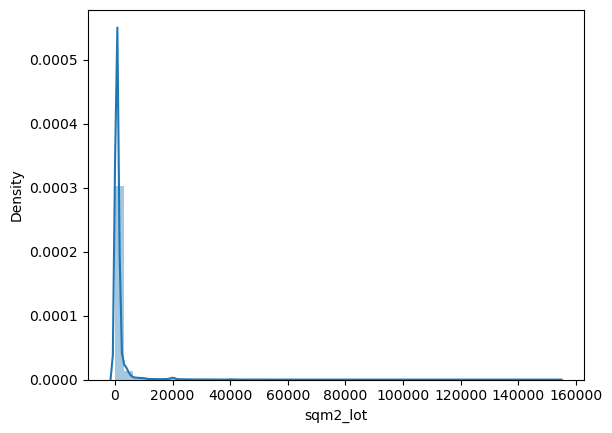

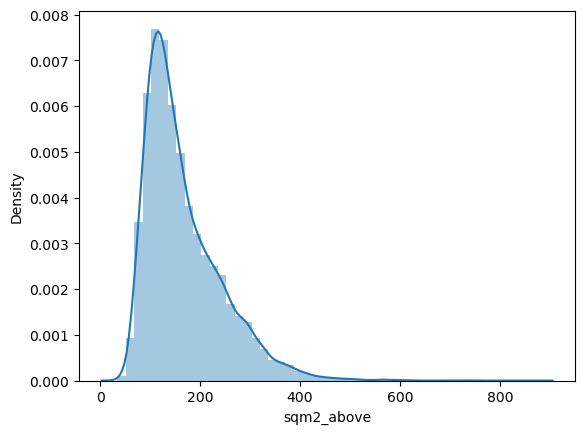

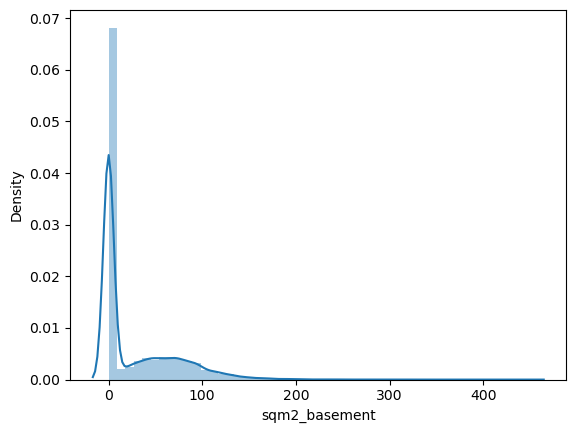

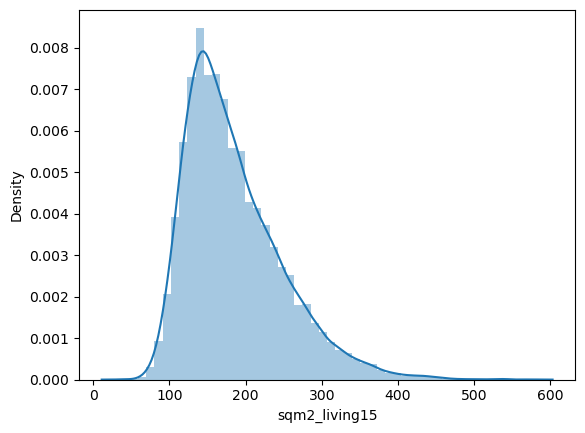

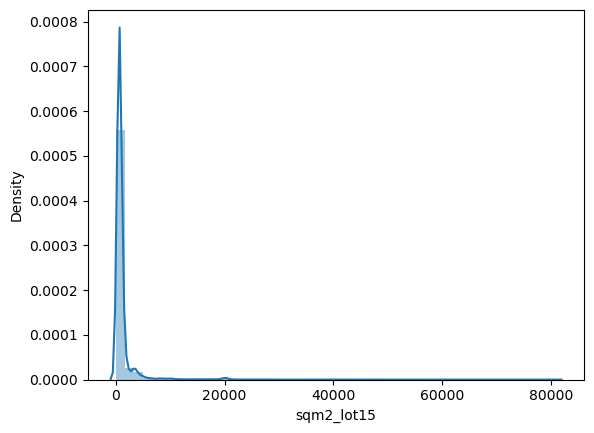

In [193]:
for column in num_model.columns:
    sns.distplot(num_model[column])
    plt.show()

In [194]:
# Checking for multicollinearity

In [195]:
num_model_corr = num_model.corr()
num_model_corr = round(num_model_corr,2)
num_model_corr

sqm2_living  sqm2_lot  sqm2_above  sqm2_basement  \
sqm2_living           1.00      0.17        0.88           0.43   
sqm2_lot              0.17      1.00        0.18           0.02   
sqm2_above            0.88      0.18        1.00          -0.05   
sqm2_basement         0.43      0.02       -0.05           1.00   
sqm2_living15         0.76      0.14        0.73           0.20   
sqm2_lot15            0.18      0.72        0.19           0.02   

               sqm2_living15  sqm2_lot15  
sqm2_living             0.76        0.18  
sqm2_lot                0.14        0.72  
sqm2_above              0.73        0.19  
sqm2_basement           0.20        0.02  
sqm2_living15           1.00        0.18  
sqm2_lot15              0.18        1.00

<Figure size 1000x1000 with 0 Axes>

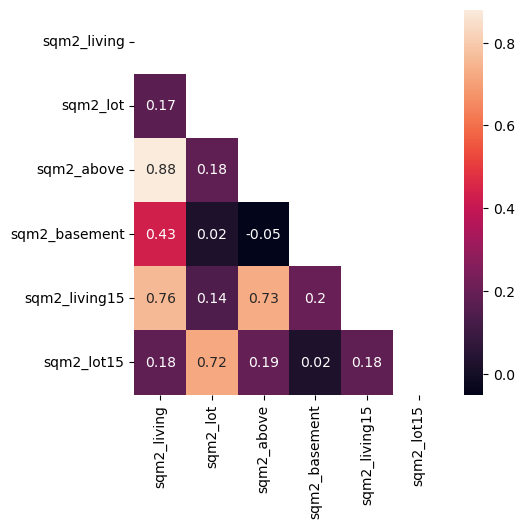

In [196]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(num_model_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(num_model_corr, mask=mask, annot=True)
plt.show()

In [197]:
# Drop the column with high collinearity
num_model = num_model.drop(["sqm2_above"], axis = 1)
num_model.head()

sqm2_living  sqm2_lot  sqm2_basement  sqm2_living15  sqm2_lot15
0        109.6     524.9            0.0          124.5       524.9
1        238.8     672.8           37.2          157.0       709.7
2         71.5     929.0            0.0          252.7       749.0
3        182.1     464.5           84.5          126.3       464.5
4        156.1     750.7            0.0          167.2       697.0

In [198]:
# Normalized the continuous variables

In [199]:
X = num_model

In [200]:
transformer = MinMaxScaler().fit(X) 
x_minmax = transformer.transform(X) 
print(x_minmax.shape)

(21420, 5)


In [201]:
X_norm = pd.DataFrame(x_minmax,index = X.index, columns=X.columns)
X_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqm2_living    21420 non-null  float64
 1   sqm2_lot       21420 non-null  float64
 2   sqm2_basement  21420 non-null  float64
 3   sqm2_living15  21420 non-null  float64
 4   sqm2_lot15     21420 non-null  float64
dtypes: float64(5)
memory usage: 1.5 MB


In [202]:
X_norm.head()

sqm2_living  sqm2_lot  sqm2_basement  sqm2_living15  sqm2_lot15
0     0.061463  0.003108       0.000000       0.161912    0.005742
1     0.167062  0.004072       0.083073       0.222119    0.008027
2     0.030323  0.005742       0.000000       0.399407    0.008513
3     0.120719  0.002714       0.188700       0.165246    0.004995
4     0.099469  0.004580       0.000000       0.241015    0.007870

In [203]:
# Concat all the data

In [204]:
model_conc = pd.concat([X_norm, cat_model], axis = 1)
model_conc.head()

sqm2_living  sqm2_lot  sqm2_basement  sqm2_living15  sqm2_lot15  floors  \
0     0.061463  0.003108       0.000000       0.161912    0.005742       1   
1     0.167062  0.004072       0.083073       0.222119    0.008027       2   
2     0.030323  0.005742       0.000000       0.399407    0.008513       1   
3     0.120719  0.002714       0.188700       0.165246    0.004995       1   
4     0.099469  0.004580       0.000000       0.241015    0.007870       1   

   bedrooms  bathrooms  waterfront  condition  grade  viewed_or_not  \
0         3          1           0          3      7              0   
1         3          2           0          3      7              0   
2         2          1           0          3      6              0   
3         4          3           0          5      7              0   
4         3          2           0          3      8              0   

   age_group  ren_or_not  quarter  fortnight  bigger_living_or_not  \
0          3           0        4          1                     1   
1          3           1        4          1                     0   
2          2           0        1          2                     1   
3          3           0        4          1                     0   
4          3           0        1          2                     1   

   bigger_lot_or_not  
0                  0  
1                  1  
2                  0  
3                  0  
4                  0

In [205]:
# X-y Split

In [206]:
X = model_conc
y = target

In [207]:
model_conc.isna().sum()

sqm2_living             0
sqm2_lot                0
sqm2_basement           0
sqm2_living15           0
sqm2_lot15              0
floors                  0
bedrooms                0
bathrooms               0
waterfront              0
condition               0
grade                   0
viewed_or_not           0
age_group               0
ren_or_not              0
quarter                 0
fortnight               0
bigger_living_or_not    0
bigger_lot_or_not       0
dtype: int64

In [208]:
len(model_conc)

21420

In [209]:
from sklearn.ensemble import RandomForestRegressor

X = model_conc
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=1000, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

### Evaluate the Model

In [210]:
R2 = r2_score(y_test, y_pred)
adj_r2 = (1 - (1 - R2) * ((X.shape[0] - 1) / (X.shape[0] - X.shape[1] - 1)))
RMSE = mean_squared_error(y_test, y_pred, squared=False)
MSE = mean_squared_error(y_test, y_pred)
print("r2 = ", R2)
print("adjusted r2 = ", adj_r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.7355423283805177
adjusted r2 =  0.7353198977422695
RMSE =  178954.94323183116
MSE =  32024871707.10791


In [211]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = y_pred
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true         pred        diff
6132   337500   284403.196   53096.804
8993   680000   414732.456  265267.544
559    331500   390202.397   58702.397
11931  571000   450118.053  120881.947
15176  431000   411431.350   19568.650
...       ...          ...         ...
17165  752000   884877.353  132877.353
1034   980000  1203505.213  223505.213
10296  350000   528923.657  178923.657
7671   299900   639618.889  339718.889
14487  171500   240715.278   69215.278

[4284 rows x 3 columns]

In [212]:
results.sort_values('diff', ascending=False).head(10)

true         pred         diff
20279  3200000  1721984.808  1478015.192
656    3070000  1625697.225  1444302.775
2711   1110000  2515119.000  1405119.000
1270   2300000   987210.074  1312789.926
15166  2200000   955222.962  1244777.038
14019  1680000  2909936.500  1229936.500
3037   2300000  1112173.861  1187826.139
2083   3850000  2674330.000  1175670.000
12638  1850000   704130.383  1145869.617
12636  2540000  1397064.657  1142935.343

In [213]:
results.describe()

true          pred          diff
count  4.284000e+03  4.284000e+03  4.284000e+03
mean   5.318953e+05  5.317350e+05  1.187257e+05
std    3.480297e+05  2.858744e+05  1.339151e+05
min    8.000000e+04  1.540053e+05  4.456500e+01
25%    3.150000e+05  3.510889e+05  4.036469e+04
50%    4.499500e+05  4.546195e+05  8.425642e+04
75%    6.250000e+05  6.152931e+05  1.514716e+05
max    4.000000e+06  2.987985e+06  1.478015e+06

<AxesSubplot:xlabel='true', ylabel='pred'>

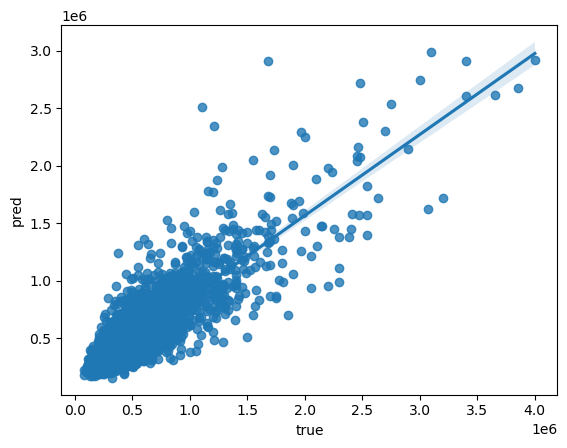

In [214]:
sns.regplot(results['true'], results['pred'])